#**User Segmentation**


##**Data Preparation**

In [ ]:
# Import Library
import pandas as pd
import numpy as np 
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Import Files
sheet_url_out = 'https://docs.google.com/spreadsheets/d/189H3zaw-Xyk_eTx3vc23QsUlNC7cjVjSx87-cXuuXUI/edit#gid=847143442'
sheet_url_out_trf = sheet_url_out.replace('/edit#gid=', '/export?format=csv&gid=')
portofolio_user = pd.read_csv(sheet_url_out_trf)
portofolio_user

,user_id,date,portofolio_invest,portofolio_AUM
0,43195,2021-10-06,500000,505146
1,43195,2021-10-07,500000,505589
2,43195,2021-10-08,500000,508187
3,43195,2021-10-11,500000,505882
4,43195,2021-10-12,500000,505877
...,...,...,...,...
302716,4457509,2021-10-29,10000,10001
302717,4457532,2021-10-29,10000,10001
302718,4457596,2021-10-29,10000,10001
302719,4457622,2021-10-29,10000,10001


User portofolio will be segmented based on RFM (Recency, Frequency, Monetary) analysis. Si new dataframe for each user_id containing recency, frequency, and total spend records.

## **Recency**

In [ ]:
df_cluster = portofolio_user.copy()
relevant_column = ['user_id','date', 'portofolio_AUM']
df_cluster = df_cluster[(relevant_column)]
df_cluster

,user_id,date,portofolio_AUM
0,43195,2021-10-06,505146
1,43195,2021-10-07,505589
2,43195,2021-10-08,508187
3,43195,2021-10-11,505882
4,43195,2021-10-12,505877
...,...,...,...
302716,4457509,2021-10-29,10001
302717,4457532,2021-10-29,10001
302718,4457596,2021-10-29,10001
302719,4457622,2021-10-29,10001


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302721 entries, 0 to 302720
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         302721 non-null  int64 
 1   date            302721 non-null  object
 2   portofolio_AUM  302721 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.9+ MB


In [ ]:
df_cluster['date'].unique()

array(['2021-10-06', '2021-10-07', '2021-10-08', '2021-10-11',
       '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15',
       '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21',
       '2021-10-22', '2021-10-25', '2021-10-26', '2021-10-27',
       '2021-10-28', '2021-10-29', '2021-08-30', '2021-08-31',
       '2021-09-01', '2021-09-02', '2021-09-03', '2021-09-06',
       '2021-09-07', '2021-09-08', '2021-09-09', '2021-09-10',
       '2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16',
       '2021-09-17', '2021-09-20', '2021-09-21', '2021-09-22',
       '2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28',
       '2021-09-29', '2021-09-30', '2021-10-01', '2021-10-04',
       '2021-10-05', '2021-08-24', '2021-08-25', '2021-08-26',
       '2021-08-27', '2021-08-11', '2021-08-12', '2021-08-13',
       '2021-08-16', '2021-08-17', '2021-08-18', '2021-08-19',
       '2021-08-20', '2021-08-23', '2021-08-09', '2021-08-10',
       '2021-08-06', '2021-08-04', '2021-08-05'], dtype

In [ ]:
df_cluster['date'].value_counts()

2021-10-29    10496
2021-10-28    10344
2021-10-27    10090
2021-10-26     9639
2021-10-25     9476
              ...  
2021-08-10      529
2021-08-09      394
2021-08-06      306
2021-08-05      198
2021-08-04      113
Name: date, Length: 63, dtype: int64

In [ ]:
pd.to_datetime(df_cluster['date'])

0        2021-10-06
1        2021-10-07
2        2021-10-08
3        2021-10-11
4        2021-10-12
            ...    
302716   2021-10-29
302717   2021-10-29
302718   2021-10-29
302719   2021-10-29
302720   2021-10-29
Name: date, Length: 302721, dtype: datetime64[ns]

In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302721 entries, 0 to 302720
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         302721 non-null  int64 
 1   date            302721 non-null  object
 2   portofolio_AUM  302721 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.9+ MB


In [ ]:
df_cluster_clean = df_cluster.copy()
df_cluster_clean['date'] = pd.to_datetime(df_cluster_clean['date'])
df_cluster_clean

,user_id,date,portofolio_AUM
0,43195,2021-10-06,505146
1,43195,2021-10-07,505589
2,43195,2021-10-08,508187
3,43195,2021-10-11,505882
4,43195,2021-10-12,505877
...,...,...,...
302716,4457509,2021-10-29,10001
302717,4457532,2021-10-29,10001
302718,4457596,2021-10-29,10001
302719,4457622,2021-10-29,10001


In [ ]:
df_cluster_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302721 entries, 0 to 302720
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         302721 non-null  int64         
 1   date            302721 non-null  datetime64[ns]
 2   portofolio_AUM  302721 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 6.9 MB


To create a dataframe with recency record for each `user_id`

In [ ]:
df_recent = df_cluster_clean.loc[df_cluster_clean.groupby('user_id')['date'].idxmax(),:].reset_index()
df_recent['recency'] = (df_recent['date'].max()-df_recent['date']).dt.days
df_recent = df_recent[['user_id','recency']]
df_recent

,user_id,recency
0,43195,0
1,47757,0
2,50701,0
3,50961,0
4,51883,0
...,...,...
13766,4457509,0
13767,4457532,0
13768,4457596,0
13769,4457622,0


In [ ]:
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13771 entries, 0 to 13770
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  13771 non-null  int64
 1   recency  13771 non-null  int64
dtypes: int64(2)
memory usage: 215.3 KB


Secondly for the RFM analysis, datafram with frequency (total orders) record for each `user_id`

In [ ]:
df_freq = df_cluster_clean.copy()
df_freq = df_freq.groupby(['user_id'])['portofolio_AUM'].count()
df_freq =pd.DataFrame(df_freq).reset_index()
df_freq.rename(columns={'portofolio_AUM':'frequency'},inplace=True)
print(df_freq)

       user_id  frequency
0        43195         18
1        47757         17
2        50701         45
3        50961         44
4        51883         21
...        ...        ...
13766  4457509          1
13767  4457532          1
13768  4457596          1
13769  4457622          1
13770  4457700          1

[13771 rows x 2 columns]


Last, dataframe containing total investment for each `user_id`

In [ ]:
df_money = df_cluster_clean.copy()
df_money= (df_money.groupby(['user_id'])['portofolio_AUM']).max()
df_money =pd.DataFrame(df_money).reset_index()
print(df_money)

       user_id  portofolio_AUM
0        43195          513627
1        47757         9614988
2        50701        10206945
3        50961        10876338
4        51883          209607
...        ...             ...
13766  4457509           10001
13767  4457532           10001
13768  4457596           10001
13769  4457622           10001
13770  4457700           99880

[13771 rows x 2 columns]


Now all every dataframe is joined

In [ ]:
cluster_join = df_recent.merge(df_freq,on='user_id').merge(df_money,on='user_id')
cluster_join.head (100)

,user_id,recency,frequency,portofolio_AUM
0,43195,0,18,513627
1,47757,0,17,9614988
2,50701,0,45,10206945
3,50961,0,44,10876338
4,51883,0,21,209607
...,...,...,...,...
95,247102,35,18,196872
96,251319,14,7,101901
97,252012,30,36,30057
98,252495,0,19,100375


In [ ]:
cluster_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13771 entries, 0 to 13770
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         13771 non-null  int64
 1   recency         13771 non-null  int64
 2   frequency       13771 non-null  int64
 3   portofolio_AUM  13771 non-null  int64
dtypes: int64(4)
memory usage: 537.9 KB


## **Scaling All Numeric Columns**

At first, `user_id` need to be casted as str before used

In [ ]:
cluster_join_clean = cluster_join.copy()
cluster_join_clean = cluster_join_clean.astype({'user_id':str})
cluster_join_clean.dtypes

user_id           object
recency            int64
frequency          int64
portofolio_AUM     int64
dtype: object

In [ ]:
numerical_col = ['recency', 'frequency', 'portofolio_AUM']

Because `recency`, `frequency`, `portofolio_AUM` have numeric values, we will scale the value of each records first.

In [ ]:
cluster_scale = cluster_join_clean.copy()
scaler = MinMaxScaler()
cluster_scale[numerical_col] = scaler.fit_transform(cluster_scale[numerical_col])
cluster_scale

,user_id,recency,frequency,portofolio_AUM
0,43195,0.0,0.274194,2.233745e-04
1,47757,0.0,0.258065,4.258345e-03
2,50701,0.0,0.709677,4.520781e-03
3,50961,0.0,0.693548,4.817548e-03
4,51883,0.0,0.322581,8.859115e-05
...,...,...,...,...
13766,4457509,0.0,0.000000,9.842082e-08
13767,4457532,0.0,0.000000,9.842082e-08
13768,4457596,0.0,0.000000,9.842082e-08
13769,4457622,0.0,0.000000,9.842082e-08


## **Clustering Analysis**

### **Determine Cluster Number**

To determine cluster number, we will use two method:

*   Elbow Method
*   Silhouette Analysis



In [ ]:
### Drop the column that are not needed
cluster_check = cluster_scale.copy()
cluster_check = cluster_scale.drop(['user_id'],axis=1)
cluster_check.head()

,recency,frequency,portofolio_AUM
0,0.0,0.274194,0.000223
1,0.0,0.258065,0.004258
2,0.0,0.709677,0.004521
3,0.0,0.693548,0.004818
4,0.0,0.322581,0.000089


The cluster range to check is from 2 to 10 which is range that make sense for business.

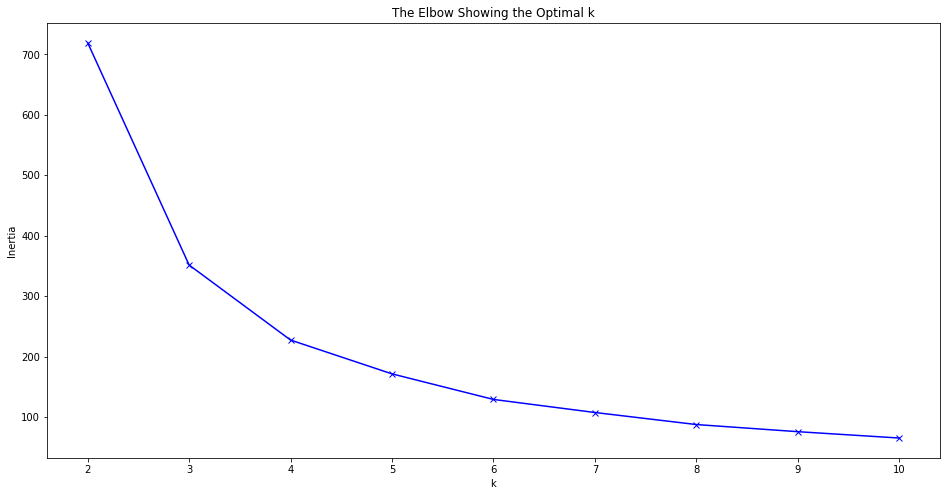

In [ ]:
distortions = []
K = range(2,11)
for k in K:
  kmeanModel = cluster.KMeans(n_clusters=k)
  kmeanModel.fit(cluster_check)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Showing the Optimal k')
plt.show()

#### **Silhouette Analysis**

In [ ]:
from silhoutte import silhoutte_analysis

For n_clusters = 2 The average silhouette_score is : 0.5258157669737786
For n_clusters = 3 The average silhouette_score is : 0.5838123605249642
For n_clusters = 4 The average silhouette_score is : 0.5230359425417072
For n_clusters = 5 The average silhouette_score is : 0.5117473172396354
For n_clusters = 6 The average silhouette_score is : 0.5164805116797484
For n_clusters = 7 The average silhouette_score is : 0.5046920268261309
For n_clusters = 8 The average silhouette_score is : 0.518212497889765
For n_clusters = 9 The average silhouette_score is : 0.5183887731419748
For n_clusters = 10 The average silhouette_score is : 0.5123207554893294


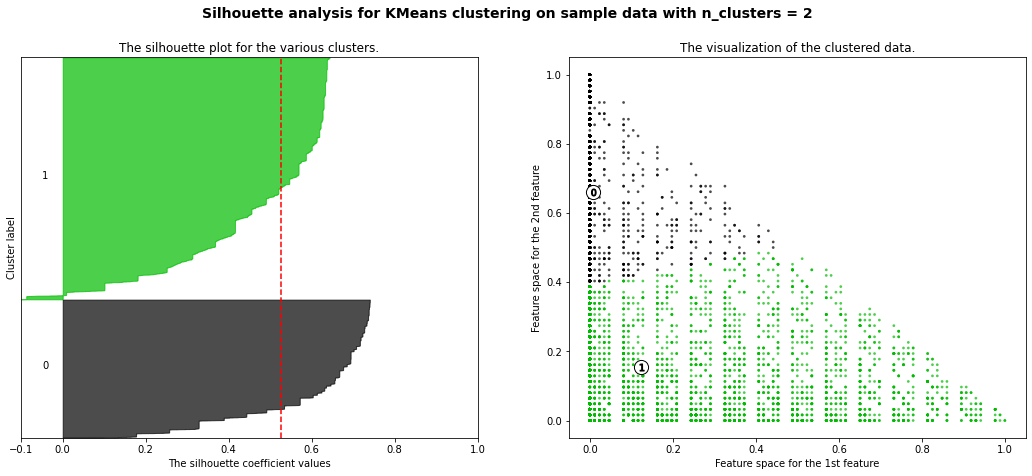

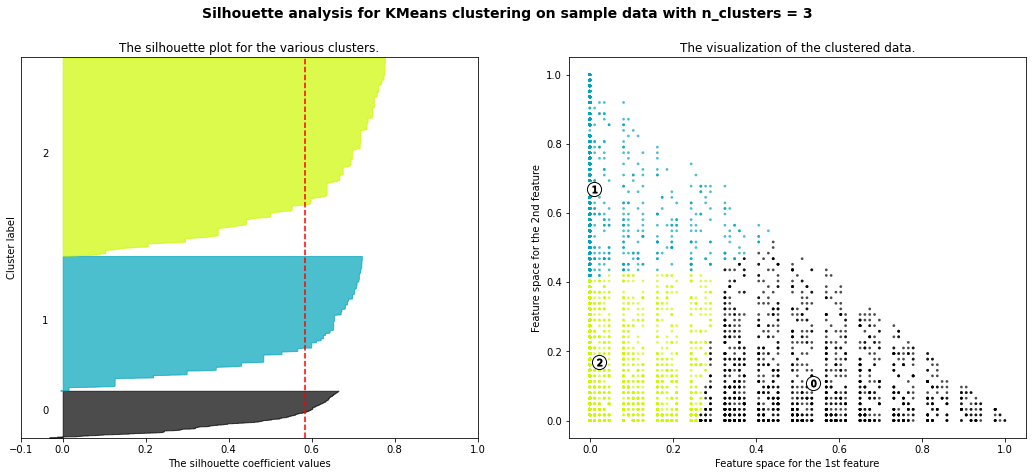

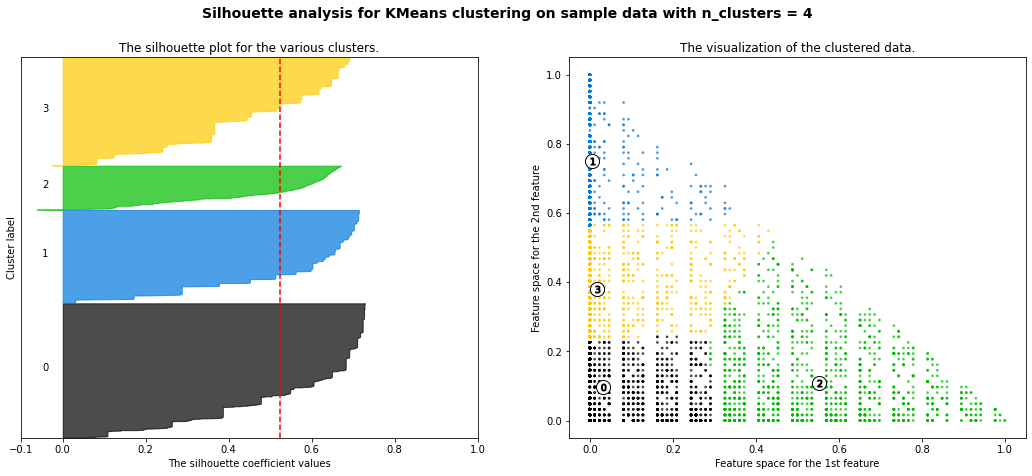

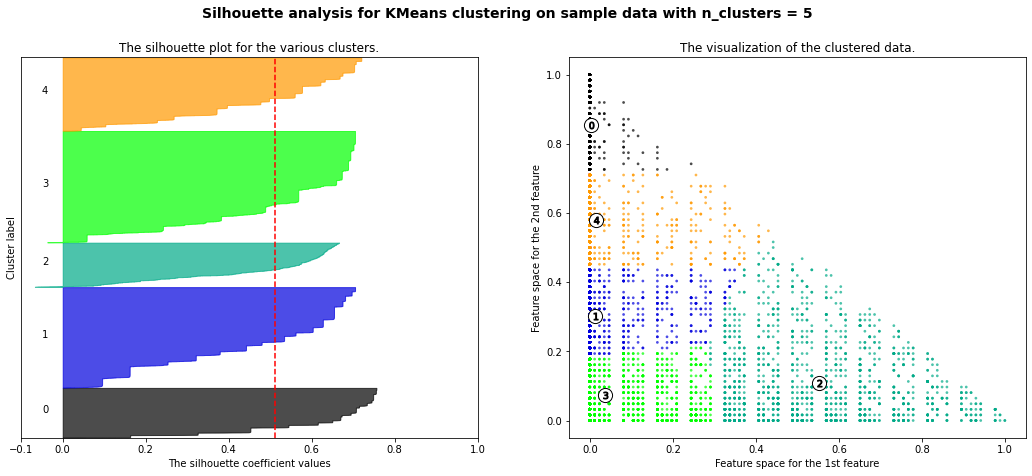

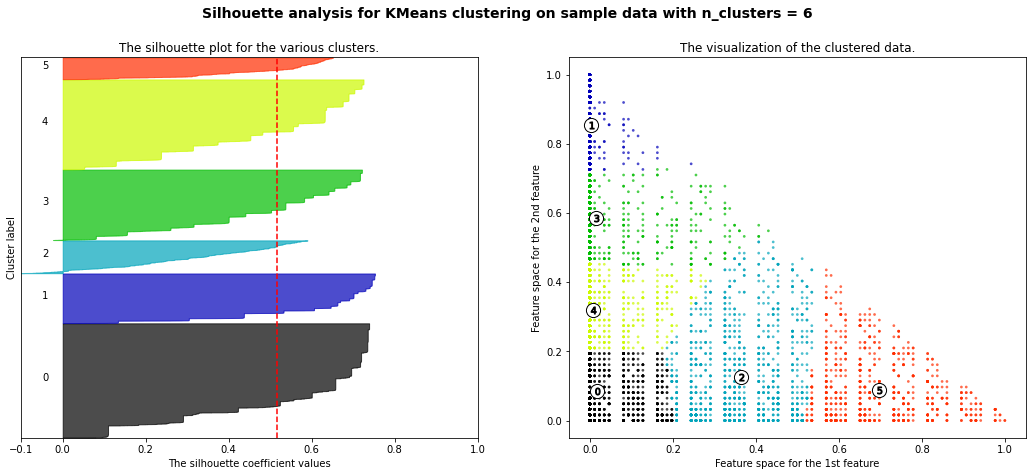

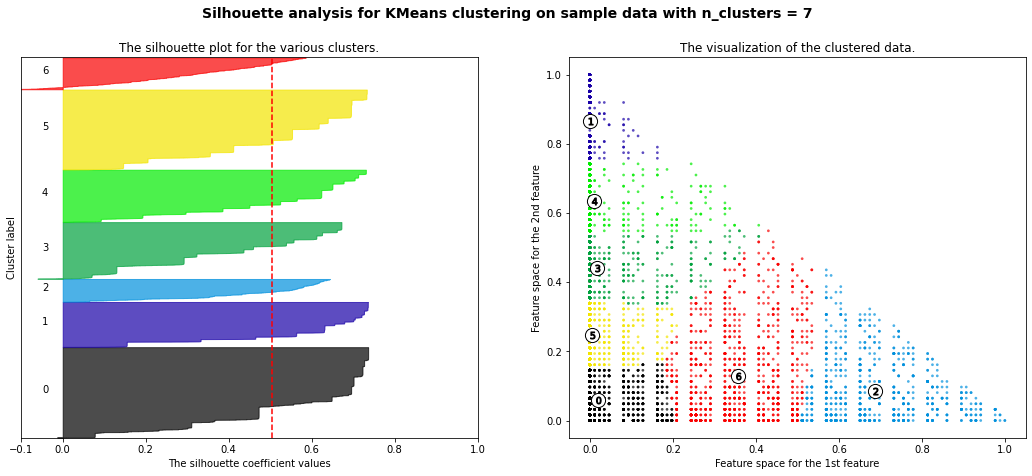

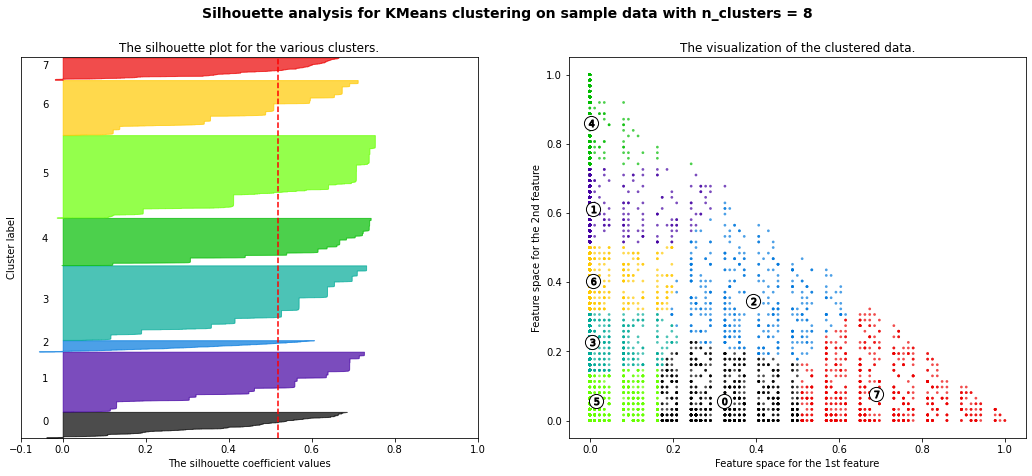

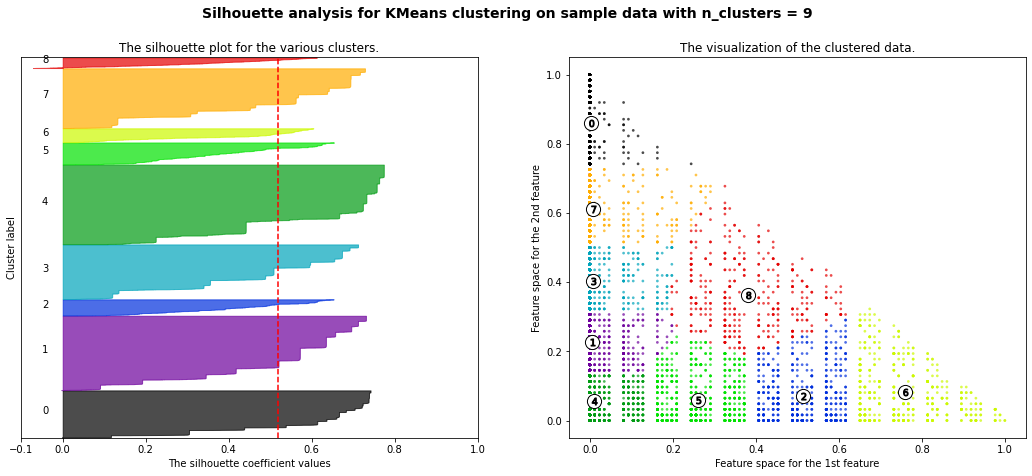

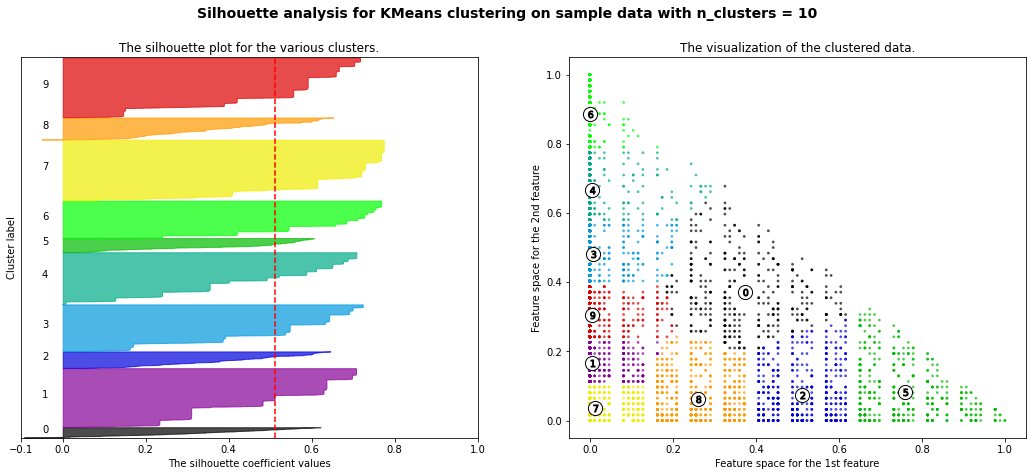

In [ ]:
silhoutte_analysis(cluster_check,list(range(2,11)))

Based on Elbow method and Silhouette results, we can choose cluster = 3.

### **Clustering Data**

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3, random_state = 2)
cluster_model.fit(cluster_check)
cluster_label = cluster_model.labels_
cluster_join_clean['cluster'] = cluster_label
cluster_join_clean

,user_id,recency,frequency,portofolio_AUM,cluster
0,43195,0,18,513627,1
1,47757,0,17,9614988,1
2,50701,0,45,10206945,2
3,50961,0,44,10876338,2
4,51883,0,21,209607,1
...,...,...,...,...,...
13766,4457509,0,1,10001,1
13767,4457532,0,1,10001,1
13768,4457596,0,1,10001,1
13769,4457622,0,1,10001,1


In [ ]:
cluster_join_clean.groupby('cluster')['recency','frequency', 'portofolio_AUM'].agg(['count','mean','median','max', 'min'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


recency                           frequency                            \
          count       mean median max min     count       mean median max min   
cluster                                                                         
0          1698  46.223204   44.0  86  23      1698   7.786219    5.0  33   1   
1          7193   1.968581    0.0  25   0      7193  11.453357   11.0  27   1   
2          4880   0.771926    0.0  37   0      4880  42.441803   41.0  63  27   

        portofolio_AUM                                            
                 count          mean    median         max   min  
cluster                                                           
0                 1698  4.467002e+05  100087.0    80750421  9779  
1                 7193  2.044149e+06  127672.0  1124582134  9874  
2                 4880  5.635558e+06  470894.0  2255630105  9971

All clusters have variative mean and median of `portofolio_AUM` frequency score. Most of the customers are 1 time purchasers. Only few customers with repat purchase in this case.

Due to this condition, we will naming the clusters based on recency score and monetary score (`investment_value`).

By looking at the median value for both metrics, we can see the general characteristics for each cluster are:
* cluster 0: Low spend and recent investment
* cluster 1: High spend and quite long time since last investment
* cluster 2: Moderate spend and long time since last investment

We can naming for all clusters as follows:
* cluster 0: Let us seed
* cluster 1: Will-ow spender 
* cluster 2: Gigantesco Yggdrasil